In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
glob.glob('*.csv')

['BL-Flickr-Images-Book.csv',
 'Cleaned_Fortune500_Combined.csv',
 'combined_olympics_data.csv',
 'damaged_students.csv',
 'fortune500.csv',
 'New_books.csv',
 'olympics_part1.csv',
 'olympics_part2.csv',
 'olympics_part3.csv',
 'Results_Combine_Summary.csv',
 'scores.csv',
 'students.csv',
 'Takemura+country_no_index.csv',
 'Takemura+country_with_index.csv',
 'us_tourism.csv',
 'us_tourism2damage-1 (1).csv',
 'us_tourism2damage-1.csv']

## Load data

In [5]:
cleaned_books_df = pd.read_csv('New_books.csv')
cleaned_books_df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
1,London,1868,Virtue & Co.,All For Greed,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
2,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
3,London,1851,James Darling,"Welsh Sketches, Chiefly Ecclesiastical, To The...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
4,London,1857,Wertheim & Macintosh,"The World In Which I Live, And My Place In It",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...


In [7]:
cleaned_books_df.describe()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
count,8287,7320,4092,8274,6509,8287
unique,1192,403,1989,8031,4949,8287
top,London,1897,Macmillan & Co.,Poems,William Shakespeare,http://www.flickr.com/photos/britishlibrary/ta...
freq,4219,174,85,10,48,1


## 1. Get the top 5 publishers and their published number.
To understanding Market Dynamics, identifying the top publishers helps understand the publishing market's dynamics during a specific period. It can indicate which publishers were dominant and how the publishing landscape might have been shaped by their activities.

In [9]:
cleaned_books_df['Publisher'].value_counts()

Publisher
Macmillan & Co.        85
London                 69
Privately printed      53
Longmans & Co.         52
Hurst & Blackett       51
                       ..
Archibald Constable     1
J. Heaton & Son         1
Bowen-Merrill Co.       1
Robert Triphook         1
Mackenzie & Dent        1
Name: count, Length: 1989, dtype: int64

In [15]:
n = 5
publisher_list = cleaned_books_df['Publisher'].value_counts()[:n]
publisher_list

Publisher
Macmillan & Co.      85
London               69
Privately printed    53
Longmans & Co.       52
Hurst & Blackett     51
Name: count, dtype: int64

In [13]:
publisher_list.index, publisher_list.to_list()

(Index(['Macmillan & Co.', 'London', 'Privately printed', 'Longmans & Co.',
        'Hurst & Blackett'],
       dtype='object', name='Publisher'),
 [85, 69, 53, 52, 51])

<BarContainer object of 5 artists>

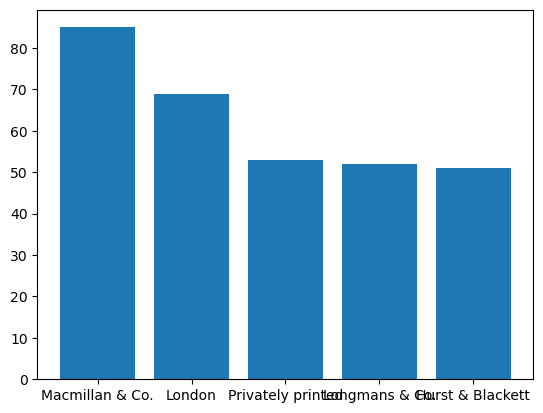

In [15]:
plt.bar(publisher_list.index,publisher_list.to_list())

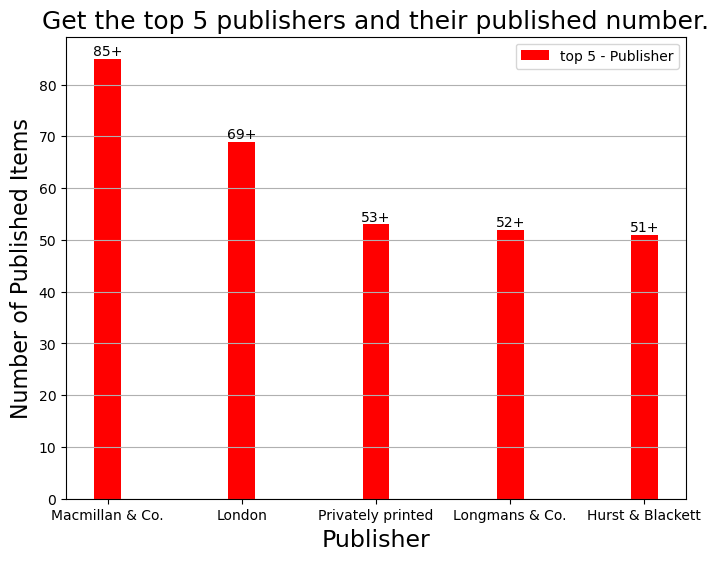

In [17]:
# Creating a bar graph
plt.figure(figsize=(8,6))

#load your data
#Your code:
x_list=publisher_list.index
y_list=publisher_list.to_list()
plt.bar(x_list, y_list, width=0.2, color="red", align="center", label="top 5 - Publisher")


# Annotating each bar with the corresponding most publish number of items
# Your Code:
for i in range(len(y_list)):
        value=y_list[i]
        plt.text(i, value, str(value)+"+", ha='center', va='bottom')


plt.legend()
plt.title('Get the top 5 publishers and their published number.',fontsize=18)
plt.xlabel('Publisher',fontsize=17)
plt.ylabel('Number of Published Items',fontsize=16)
plt.grid(axis='y')

plt.show()

## Practice 1
### 1.1 Identify the top five publishers with the greatest number of books published. 
### 1.2 Ascertain the year in which each of these publishers achieved their highest sales, along with the total number of books they published in that particular year.


In [29]:
publisher_list

Publisher
Macmillan & Co.      85
London               69
Privately printed    53
Longmans & Co.       52
Hurst & Blackett     51
Name: count, dtype: int64

In [33]:
# Selecting the data for the chosen publisher "Macmillan & Co."
#cleaned_books_df[cleaned_books_df['Publisher'] == 'Macmillan & Co.']
#cleaned_books_df[cleaned_books_df['Publisher']=='Macmillan & Co.']
macdf=cleaned_books_df[cleaned_books_df['Publisher']=='Macmillan & Co.']
macdf['Date of Publication'].value_counts()[:1]

Date of Publication
1896    16
Name: count, dtype: int64

In [37]:
dic={}
for pub in publisher_list.index:
    print(pub)
    author_books=cleaned_books_df[cleaned_books_df['Publisher']==pub]
    year_info=author_books['Date of Publication'].value_counts()[:1]
    year=year_info.index[0]
    bookNum=year_info[0]
    dic[pub] = [year,bookNum]
dic

Macmillan & Co.
London
Privately printed
Longmans & Co.
Hurst & Blackett


C:\Users\kobep\AppData\Local\Temp\ipykernel_23300\1920709808.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bookNum=year_info[0]
C:\Users\kobep\AppData\Local\Temp\ipykernel_23300\1920709808.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bookNum=year_info[0]
C:\Users\kobep\AppData\Local\Temp\ipykernel_23300\1920709808.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bookNum=year_info[0]
C:\Users\kobep\AppData\Local\Temp\

{'Macmillan & Co.': ['1896', 16],
 'London': ['1866', 3],
 'Privately printed': ['1852', 3],
 'Longmans & Co.': ['1889', 6],
 'Hurst & Blackett': ['1856', 3]}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


['Macmillan & Co.', 'London', 'Privately printed', 'Longmans & Co.', 'Hurst & Blackett'] ['1896', '1866', '1852', '1889', '1856'] [16, 3, 3, 6, 3]


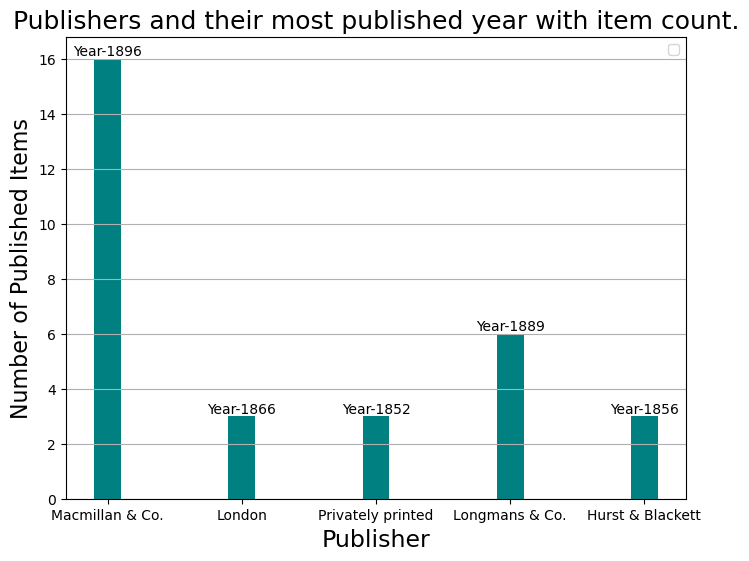

In [41]:
publisher_name = list(dic.keys())
most_publish_year=[dic[publisher][0] for publisher in dic]
publish_item=[dic[publisher][1] for publisher in dic]
# Creating a bar graph
plt.figure(figsize=(8,6))

print(publisher_name, most_publish_year, publish_item)
#Your code:
x_list=publisher_name
y_list=publish_item
plt.bar(x_list, y_list, width=0.2, color="teal", align="center")

# Annotating each bar with the corresponding most publish number of items
# Your code:
for i in range(len(publish_item)):
        year=most_publish_year[i]
        x_posi=i
        y_posi=publish_item[i]
        textvalue="Year-"+year
        plt.text(x_posi, y_posi, textvalue, ha='center', va='bottom')


plt.legend()
plt.title('Publishers and their most published year with item count.',fontsize=18)
plt.xlabel('Publisher',fontsize=17)
plt.ylabel('Number of Published Items',fontsize=16)
plt.grid(axis='y')

plt.show()





## 2. Get the 5 most published place
Reason: For contemporary publishers, marketers, and authors, understanding historical publishing centers can provide insights into established markets and potential opportunities for new ventures or expansions.

In [43]:
cleaned_books_df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
1,London,1868,Virtue & Co.,All For Greed,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
2,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
3,London,1851,James Darling,"Welsh Sketches, Chiefly Ecclesiastical, To The...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
4,London,1857,Wertheim & Macintosh,"The World In Which I Live, And My Place In It",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...


In [45]:
cleaned_books_df.describe()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
count,8287,7320,4092,8274,6509,8287
unique,1192,403,1989,8031,4949,8287
top,London,1897,Macmillan & Co.,Poems,William Shakespeare,http://www.flickr.com/photos/britishlibrary/ta...
freq,4219,174,85,10,48,1


In [47]:
n = 5
publisher_place_list = cleaned_books_df['Place of Publication'].value_counts()[:n]
publisher_place_list

Place of Publication
London       4219
Paris         479
Edinburgh     208
New York      177
Leipzig       119
Name: count, dtype: int64

In [49]:
others_place_number = cleaned_books_df['Place of Publication'].value_counts()[5:].sum()
others_place_number

3085

In [59]:
def get_publish_place_data(n, df):
    publisher_place_list = df['Place of Publication'].value_counts()[:n]
    others_place_number = df['Place of Publication'].value_counts()[n:].sum()

    dic = {}
    for pub, item in zip(publisher_place_list.index, publisher_place_list):
        dic[pub] = item
    dic["Others"] = others_place_number

    return dic

get_publish_place_data(5, cleaned_books_df)


{'London': 4219,
 'Paris': 479,
 'Edinburgh': 208,
 'New York': 177,
 'Leipzig': 119,
 'Others': 3085}

['London', 'Paris', 'Edinburgh', 'New York', 'Leipzig', 'Others']
[4219, 479, 208, 177, 119, 3085]


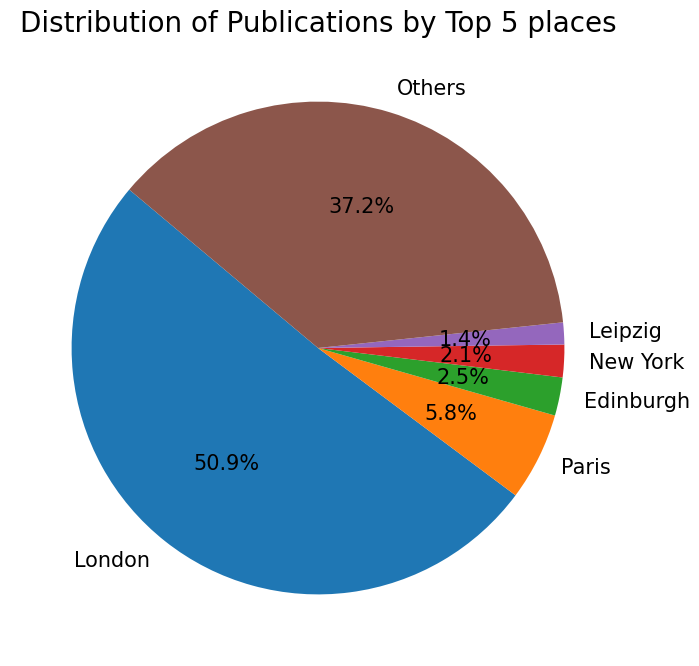

In [71]:
# Pie Chart Analysis: 

# Sample data provided earlier (assuming the same structure as the actual dataset)
place_of_data = get_publish_place_data(5,cleaned_books_df)

# Extracting data for pie chart
places = list(place_of_data.keys())
publications = [place_of_data[place] for place in places]
print(places)
print(publications)


# Creating a pie chart
plt.figure(figsize = (8,8))
# Your Pie chart code:
plt.pie(publications, labels=places, autopct="%1.1f%%", startangle=140,textprops={'fontsize':15})

plt.title('Distribution of Publications by Top 5 places', fontsize =20)
plt.show()



### 3.1 Demo for  `.groupby`  function

In [73]:
# Sample DataFrame
df = pd.DataFrame({'Category': ['A', 'B', 'A', 'B'],
                   'Values': [10, 20, 30, 40]})

df

,Category,Values
0,A,10
1,B,20
2,A,30
3,B,40


In [75]:
# Grouping by 'Category' and calculating the size of each group
grouped = df.groupby('Category').size()

print(grouped)

Category
A    2
B    2
dtype: int64


In [77]:
# Grouping by 'Category' and calculating the mean of each group
grouped = df.groupby('Category').sum()

print(grouped)

          Values
Category        
A             40
B             60


## 3. Show the yearly trend in the number of publications

### 3.2 Use `.groupby` on Books data

In [79]:
cleaned_books_df.head()

,Place of Publication,Date of Publication,Publisher,Title,Author,Flickr URL
0,London,1879,S. Tinsley & Co.,Walter Forbes,AA,http://www.flickr.com/photos/britishlibrary/ta...
1,London,1868,Virtue & Co.,All For Greed,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
2,London,1869,"Bradbury, Evans & Co.",Love The Avenger,A. A A.,http://www.flickr.com/photos/britishlibrary/ta...
3,London,1851,James Darling,"Welsh Sketches, Chiefly Ecclesiastical, To The...",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...
4,London,1857,Wertheim & Macintosh,"The World In Which I Live, And My Place In It",E. S A.,http://www.flickr.com/photos/britishlibrary/ta...


In [81]:
cleaned_books_df['Date of Publication']

0       1879 
1        1868
2        1869
3        1851
4        1857
        ...  
8282     1838
8283     1831
8284      NaN
8285     1834
8286     1834
Name: Date of Publication, Length: 8287, dtype: object

In [83]:
yearly_publication_counts = cleaned_books_df.groupby('Date of Publication').size()
yearly_publication_counts

Date of Publication
112. G. & W. B. Whittaker    1
1510?]                       1
1540                         1
1570                         1
1592                         1
                            ..
1900]                        1
1911.                        1
1915                         1
MDCCCC.                      1
c.1825]                      1
Length: 403, dtype: int64

In [85]:
for i in yearly_publication_counts.index:
    print(i,type(i))

112. G. & W. B. Whittaker <class 'str'>
1510?] <class 'str'>
1540 <class 'str'>
1570  <class 'str'>
1592 <class 'str'>
1602 <class 'str'>
1607 <class 'str'>
1625 <class 'str'>
1628 <class 'str'>
1631 <class 'str'>
1632 <class 'str'>
1633 <class 'str'>
1635 <class 'str'>
1637 <class 'str'>
1638 <class 'str'>
1639 <class 'str'>
1640 <class 'str'>
1641 <class 'str'>
1641?] <class 'str'>
1647 <class 'str'>
1647?] <class 'str'>
1648 <class 'str'>
1651 <class 'str'>
1653 <class 'str'>
1654 <class 'str'>
1654  <class 'str'>
1656 <class 'str'>
1656.  <class 'str'>
1657 <class 'str'>
1658 <class 'str'>
1660 <class 'str'>
1661 <class 'str'>
1662 <class 'str'>
1663 <class 'str'>
1664 <class 'str'>
1667 <class 'str'>
1670 <class 'str'>
1671 <class 'str'>
1672 <class 'str'>
1673 <class 'str'>
1674 <class 'str'>
1675 <class 'str'>
1676 <class 'str'>
1677 <class 'str'>
1678 <class 'str'>
1678?] <class 'str'>
1679 <class 'str'>
1680 <class 'str'>
1681 <class 'str'>
1682 <class 'str'>
1683 <class 'str'

In [ ]:
for i in yearly_publication_counts.index:
    print(i,clean_year(i))

In [ ]:
def clean_year(year):
    
    if year == 'nan':
        return '0'
    if year[0]!='1':
        year=year[year.find('1'):]
    if ' ' in year:
        year=year[:year.find(' ')]
    if '/' in year:
        year=year[:year.find('/')]
    if '?' in year:
        year = year[:year.find('?')]
    if ']' in year:
        year = year[:year.find(']')]
    if '.' in year:
        year = year[:year.find('.')]

    if year.isdigit():
        year = int(year)
    else:
        year = 30

    return year

cleaned_books_df['Date of Publication'] = cleaned_books_df['Date of Publication'].astype(str)
cleaned_books_df['Date of Publication'] = cleaned_books_df['Date of Publication'].apply(clean_year)
cleaned_books_df['Date of Publication'] = cleaned_books_df['Date of Publication'].astype(int)
cleaned_books_df.head()

### Get line plot 

In [ ]:
# Scatter Plot Analysis: Year of Publication vs. Number of Publications

# Grouping the data by 'Date of Publication' to count the number of publications each year
testdata = cleaned_books_df[cleaned_books_df['Date of Publication']>1000]
yearly_Publication_count = testdata.groupby('Date of Publication').size()

# Sorting the data by year (index of the grouped data)
sorted_years = yearly_Publication_count.sort_index()

# Creating a scatter plot
plt.figure(figsize=(10,6))
plt.scatter(sorted_years.index,sorted_years,color='blue')


plt.title('Year of Publication vs. Number of Publications',fontsize=18)
plt.xlabel('Year of Publication',fontsize=17)
plt.ylabel('Number of publications',fontsize=16)
plt.grid(axis='y')

plt.show()

# A line graph to show the yearly trend in the number of publications.

## Practice 2
### Identify the top five publishers with their publicated books during 1800 - 1900. (line graph)


In [ ]:
publish_list = cleaned_books_df['Publisher'].value_counts()[:5]
publish_list

In [ ]:
dfA = cleaned_books_df[cleaned_books_df['Publisher'] ==publish_list.index[0]]
filerdf = dfA[(dfA['Date of Publication']>=1800) & (dfA['Date of Publication']<=1900)]
yearly_counts = filerdf.groupby('Date of Publication').size()

yearly_counts.sort_index()

In [ ]:
def filter_topX_publisher_in_1800_1900(n,df):
    #n: Number of target searches
    #df: input dataframe
    #Your code:
    
    
    return dic_res

filter_topX_publisher_in_1800_1900(5,cleaned_books_df)

In [ ]:
# Extracting publishers, publish years, and publish items
publisher_data_dic = filter_topX_publisher_in_1800_1900(5,cleaned_books_df)

# Creating a line graph
plt.figure(figsize=(10, 6))

for pub,years_data in publisher_data_dic.items():
#     print(pub,years_data)
    plt.plot(years_data.index, years_data, '-', label=pub)

# plt.plot(yearly_publication_counts.index, yearly_publication_counts, color='blue')
plt.title('Year of Publication vs. Number of Publications')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Publications')
# plt.xticks([1500,1550,1600,1650,1700,1750,1800,1850,1900],
#            ['1890','1891','1892','1893','1894','1895','1896','1897','1898',],fontsize = 15)
plt.legend()
plt.grid(axis='y')
plt.show()

### Compute the cumulative sum of Publications. (Please watch the tutorial)